Attempt at trying and learning the Flood Dataset in Kaggle [[Here](https://www.kaggle.com/competitions/playground-series-s4e5/code)]

In [15]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import seaborn as sns
import sklearn.metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

import pandas as pd
import seaborn as sns 
import numpy as np
train = pd.read_csv('datasets/floodtrain.csv')
test = pd.read_csv('datasets/floodtest.csv')

def split_data(data, field=["FloodProbability", "id"], size = None):
    if size != None:
        data = data.sample(size, random_state=42)
    y = data["FloodProbability"]
    X = data.drop(field, axis=1)
    return X,y
    
from sklearn.model_selection import cross_val_score
def evaluate_score(estimator, data, size=100_000):
    X, y = split_data(data, size=size)
    results = cross_val_score(estimator, X, y, scoring='r2')
    print(results)
    print(f'The average is {np.mean(results):.4f}')
    
from sklearn.model_selection import learning_curve, LearningCurveDisplay

def lc(estimator, data, size=100_000):
    X, y = split_data(data, size=size)
    train_size, train_scores, test_scores = learning_curve(estimator, X, y, scoring='r2')
    LearningCurveDisplay(train_sizes=train_size, train_scores=train_scores, test_scores=test_scores, score_name='r2').plot()
    
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.compose import make_column_selector, make_column_transformer
from scipy.stats import boxcox, boxcox_llf

import sklearn

sklearn.set_config(transform_output="pandas")
def boxcox_calcu(df):
    #df = df.apply(lambda x: boxcox(x+1)[0], axis=0)
    #df = df.sort_values(by=df.columns.to_list(), axis=1)
    
    sorted = np.sort(df.values, axis=1)
    summation= np.sum(sorted ,axis=1)
    median = np.mean(sorted, axis=1)
    std = np.std(sorted, axis=1)
    
    data = np.c_[sorted, summation, median, std]
    return pd.DataFrame(data=data)
    
def build_pipeline(*estimator):
    print(f"Pipeline build for {str(estimator)}")
    columns = make_column_transformer(
        (FunctionTransformer(boxcox_calcu), make_column_selector(dtype_include=[np.generic])),
         verbose_feature_names_out=False, remainder="drop"
    )
    
    column_select = make_column_selector( 
        ("passthrough", )
    )
    
    pipeline = make_pipeline(
                        columns,
                        StandardScaler())
    
    for arg in estimator:
        pipeline = make_pipeline(pipeline, arg)
    
    return pipeline

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

def gs_score(estimator, params, data, size):
    X, y = split_data(data, size=size)
    gs = GridSearchCV(estimator=estimator, param_grid=params, cv=4, scoring='r2')
    gs.fit(X, y)
    print(f'The best Score {gs.best_score_}')
    return gs
    
    

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
#p = build_pipeline(xgb.XGBRegressor(eval_metric=sklearn.metrics.r2_score, n_estimators=100))
p = build_pipeline(HistGradientBoostingRegressor(categorical_features="from_dtype"))


# gbr = {
#     'gradientboostingregressor__n_estimators': [10,100,200],
#      'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
#      'gradientboostingregressor__max_depth': [1,2,3,4],
#      'gradientboostingregressor__n_iter_no_change': [5,10],
    
# }


build_pipeline().fit_transform(train)


Pipeline build for (HistGradientBoostingRegressor(categorical_features='from_dtype'),)
Pipeline build for ()


x0        x1        x2        x3        x4        x5        x6  \
0       -2.998435 -1.568142 -0.350823  0.440286 -0.070163 -0.551744 -1.017734   
1       -2.998435 -1.561607 -1.711692 -1.005050 -0.070163 -0.551744 -1.017734   
2        0.450920 -0.842736 -0.350823 -1.005050 -0.070163 -0.551744 -1.017734   
3        0.483461  0.464303  1.010047  0.440286  1.452458  1.015652  0.581143   
4       -0.297525 -0.842736 -0.350823 -1.005050 -1.592783 -2.119139 -1.017734   
...           ...       ...       ...       ...       ...       ...       ...   
1117952  0.223132 -0.842736 -0.350823 -1.005050 -0.070163 -0.551744 -1.017734   
1117953  0.125509 -0.842736 -0.350823 -1.005050 -0.070163 -0.551744 -1.017734   
1117954  0.158050 -0.842736 -0.350823  0.440286 -0.070163  1.015652  0.581143   
1117955  0.223132  0.464303  1.010047  0.440286 -0.070163 -0.551744  0.581143   
1117956  0.646167 -0.842736 -0.350823  1.885623  1.452458  1.015652  2.180019   

               x7        x8        x9  ...       x15       x16       x17  \
0       -1.495045 -0.253586 -0.651512  ... -1.508235 -1.925165 -1.039811   
1       -1.495045 -1.933049 -0.651512  ... -0.057232 -0.546564  0.240348   
2       -1.495045 -0.253586  1.000901  ... -0.057232 -0.546564  0.240348   
3        0.159598 -0.253586 -0.651512  ... -0.057232 -0.546564  0.240348   
4       -1.495045 -1.933049 -2.303924  ... -2.959238 -1.925165 -2.319969   
...           ...       ...       ...  ...       ...       ...       ...   
1117952  0.159598 -0.253586 -0.651512  ...  1.393770  0.832038  0.240348   
1117953  0.159598 -0.253586 -0.651512  ... -1.508235  0.832038  1.520507   
1117954  0.159598  1.425877  1.000901  ... -1.508235 -0.546564 -1.039811   
1117955  0.159598 -0.253586 -0.651512  ... -0.057232 -0.546564  0.240348   
1117956  1.814240  1.425877  1.000901  ...  1.393770  0.832038  1.520507   

              x18       x19       x20       x21       x22       x23       x24  
0       -0.384231 -1.081853 -0.967715 -1.732024 -1.732064 -1.732064 -1.732004  
1       -0.384231 -0.057876 -0.967715 -1.732021 -1.732061 -1.732061 -1.731999  
2       -0.384231 -1.081853 -1.734090 -1.732024 -1.732042 -1.732042 -1.732003  
3       -0.384231 -1.081853 -0.967715 -1.732024 -1.732024 -1.732024 -1.732007  
4       -2.709581 -2.105830 -2.500465 -1.732031 -1.732120 -1.732120 -1.732012  
...           ...       ...       ...       ...       ...       ...       ...  
1117952  0.778444  1.990078  0.565035  1.732037  1.732038  1.732038  1.732037  
1117953  1.941119  0.966101 -0.201340  1.732040  1.732031  1.732031  1.732040  
1117954 -0.384231  0.966101 -0.201340  1.732043  1.732041  1.732041  1.732043  
1117955 -0.384231 -1.081853 -0.967715  1.732046  1.732047  1.732047  1.732046  
1117956  0.778444 -0.057876 -0.201340  1.732049  1.732084  1.732084  1.732048  

[1117957 rows x 25 columns]

In [ ]:

hs = {
    'histgradientboostingregressor__scoring': ['r2'],
    'histgradientboostingregressor__n_iter_no_change': [5, 10],
    'histgradientboostingregressor__max_bins': [10, 17, 30],
    'histgradientboostingregressor__l2_regularization': [0.01 .05, 1],
    'histgradientboostingregressor__loss': ['squared_error', 'absolute_error']
    }

gs = gs_score(p, hs , train, 10_000)

Let's create a test set

In [ ]:

lc(gs.best_estimator_, data=train)

In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor

pipeline = make_pipeline(StandardScaler(), 
                         SGDRegressor())

num = 10000

params = {
    "polynomialfeatures__degree": list(range(1,2)),
    "linearregression__fit_intercept": [False, True],
}

sgd_params = {
    "polynomialfeatures__degree": list(range(1,2)),
    "sgdregressor__max_iter": np.linspace(200,800,50)
}

# gs = GridSearchCV(pipeline, sgd_params, refit=True)

# num = 10000
# gs.fit(X_train[:num], y_train[:num])

from sklearn.metrics import r2_score

evaluate_score(pipeline, data=train)


/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.

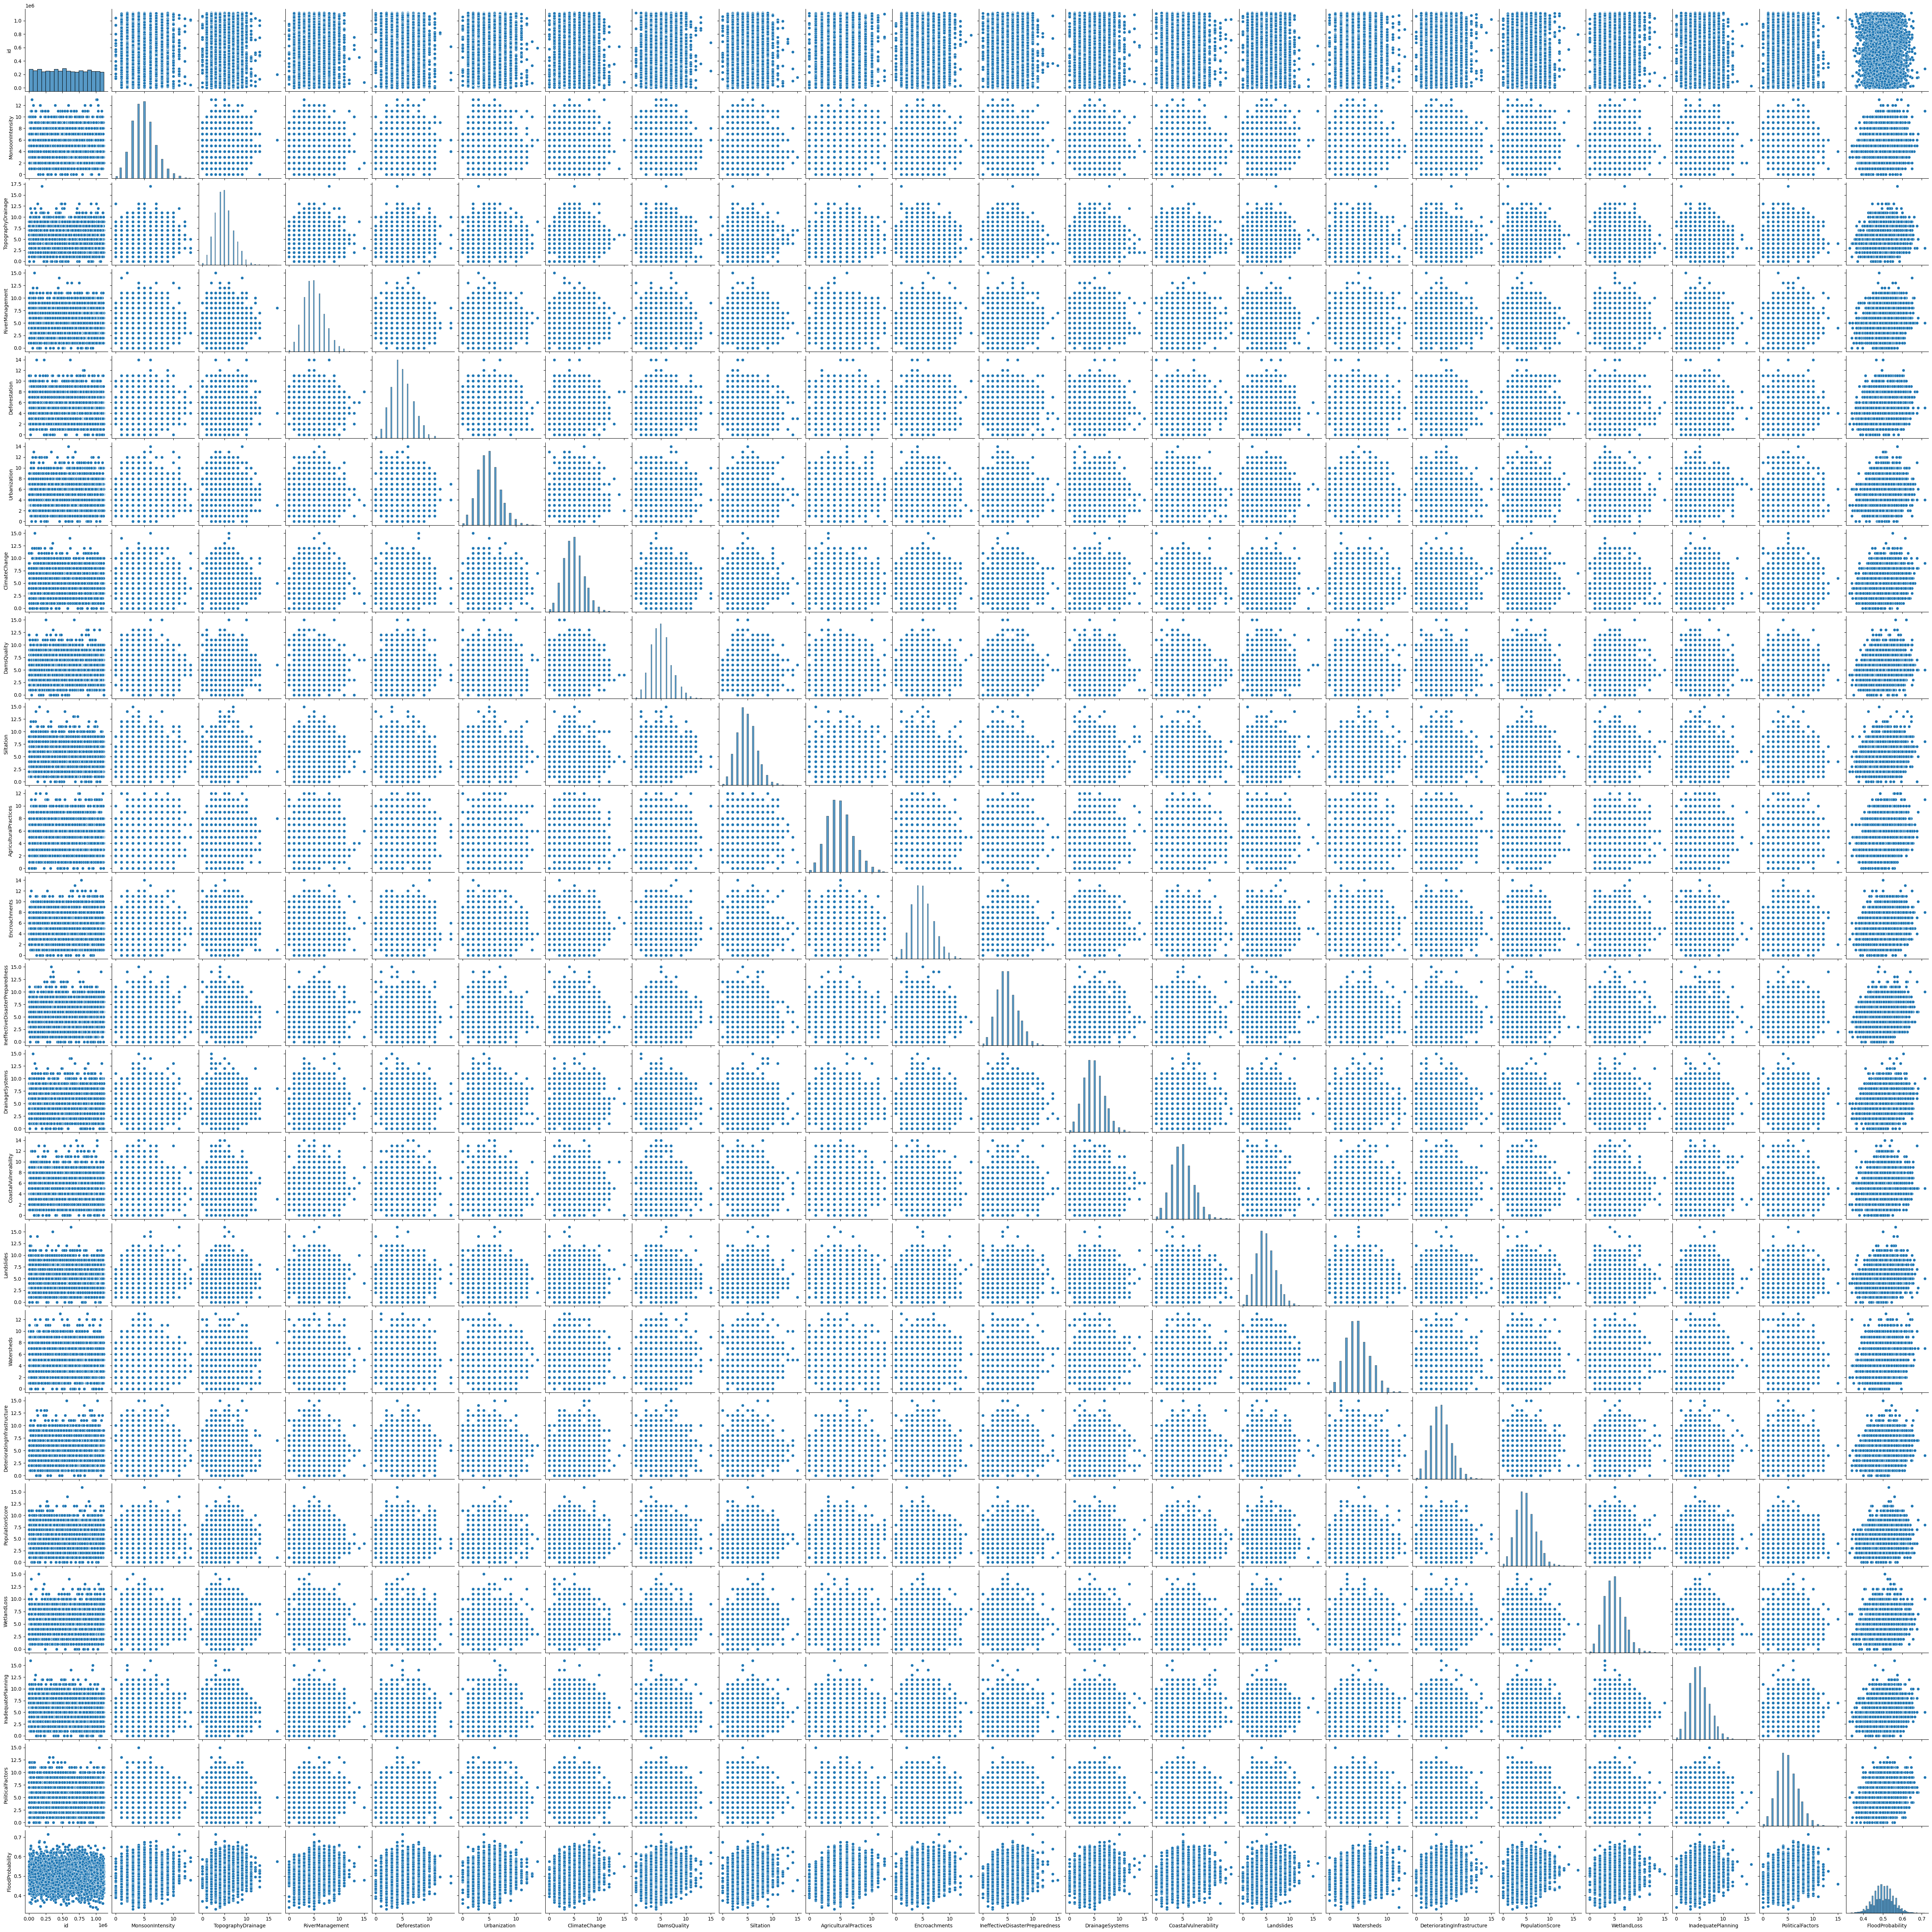

In [2]:
sns.pairplot(train.sample(5000))

<Axes: >

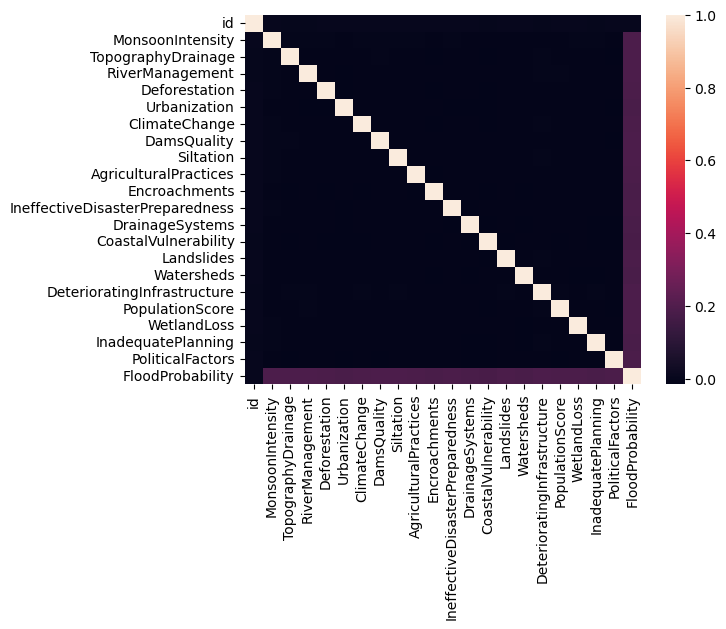

In [3]:
sns.heatmap(train.corr())

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train.loc[:400, ["Deforestation", "Urbanization", "ClimateChange", "PoliticalFactors", "Siltation", "RiverManagement"]]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data[vif_data["VIF"] > 1])

            feature       VIF
0     Deforestation  5.407439
1      Urbanization  5.608668
2     ClimateChange  5.504176
3  PoliticalFactors  5.731355
4         Siltation  4.967411
5   RiverManagement  5.003386


In [ ]:
from scipy.stats import boxcox, boxcox_llf

sns.histplot(data=boxcox(train.ClimateChange + 1))



In [22]:
(
    train.groupby(['MonsoonIntensity', 'Deforestation'])
    .apply(lambda x: x.loc[x.ClimateChange.idxmax()], include_groups=False)
    .sort_values(by="Siltation", ascending=False)
)

id  TopographyDrainage  \
MonsoonIntensity Deforestation                                  
13               5              1033211.0                 3.0   
7                5               235954.0                 7.0   
6                13              660226.0                 6.0   
13               1               656833.0                 3.0   
16               3               343172.0                 2.0   
...                                   ...                 ...   
9                10              184193.0                 5.0   
10               7                23037.0                 3.0   
1                15             1059221.0                10.0   
                 7                 3625.0                 7.0   
3                10              189724.0                 6.0   

                                RiverManagement  Urbanization  ClimateChange  \
MonsoonIntensity Deforestation                                                 
13               5                          6.0           7.0           12.0   
7                5                          7.0           6.0           14.0   
6                13                         4.0           5.0           12.0   
13               1                          8.0           5.0            7.0   
16               3                          5.0           6.0            9.0   
...                                         ...           ...            ...   
9                10                        11.0           3.0           12.0   
10               7                          2.0           7.0           12.0   
1                15                         6.0           9.0            6.0   
                 7                          6.0           5.0           14.0   
3                10                         6.0           6.0           13.0   

                                DamsQuality  Siltation  AgriculturalPractices  \
MonsoonIntensity Deforestation                                                  
13               5                      3.0       12.0                    7.0   
7                5                      4.0       11.0                    6.0   
6                13                     5.0       11.0                    3.0   
13               1                      7.0       11.0                    5.0   
16               3                      3.0       10.0                    8.0   
...                                     ...        ...                    ...   
9                10                     2.0        1.0                    3.0   
10               7                      2.0        1.0                    2.0   
1                15                     6.0        1.0                    5.0   
                 7                      1.0        0.0                    7.0   
3                10                     4.0        0.0                    3.0   

                                Encroachments  \
MonsoonIntensity Deforestation                  
13               5                        3.0   
7                5                        6.0   
6                13                       3.0   
13               1                        3.0   
16               3                        1.0   
...                                       ...   
9                10                       5.0   
10               7                        8.0   
1                15                       0.0   
                 7                        5.0   
3                10                       1.0   

                                IneffectiveDisasterPreparedness  \
MonsoonIntensity Deforestation                                    
13               5                                          3.0   
7                5                                          5.0   
6                13                                         3.0   
13               1                                          3.0   
16               3                                        

In [ ]:
from scipy.stats import boxcox

import seaborn as sns 
import matplotlib.pyplot as plt


plt.figure(figsize=(20,20))

sns.lineplot(data=train.ClimateChange)

plt.xlabel("hello")

Let's try PCA

In [36]:
from sklearn.decomposition import PCA


pca = build_pipeline(PCA())

X,y = split_data(train)

pca.fit(X=X,y=y)



Pipeline build for (PCA(),)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boxcox_calcu at 0x147442840>),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x16be82f50>)],
                                                    verbose_feature_names_out=False)),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA())])

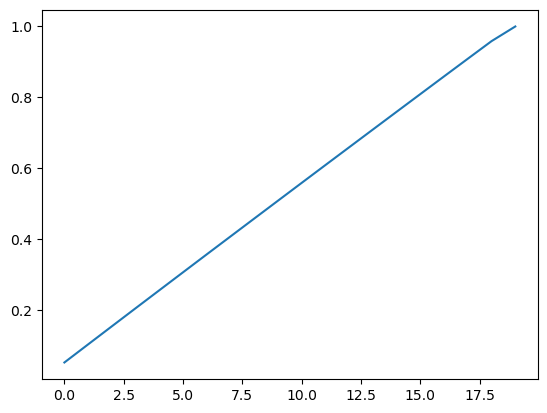

In [39]:

import matplotlib.pyplot as plt
pca[-1].explained_variance_ratio_

plt.plot(np.cumsum(pca[-1].explained_variance_ratio_))

In [3]:

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import catboost

#pca = build_pipeline(xgb.XGBRegressor(n_jobs=-1, learning_rate=.15))

cat = build_pipeline(catboost.CatBoostRegressor(verbose=False))

#evaluate_score(cat, train)



Pipeline build for (<catboost.core.CatBoostRegressor object at 0x113be0650>,)


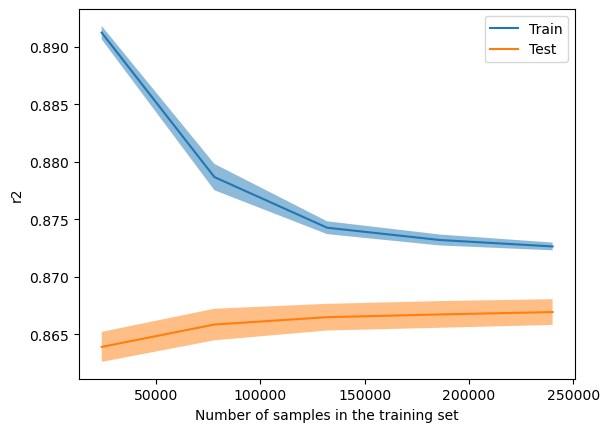

In [25]:
lc(cat, train, size=300000)

In [16]:
parameters = {
            'learning_rate' : [0.01,0.02,0.03],
            }

gs = build_pipeline(catboost.CatBoostRegressor(verbose=False))

gs.fit(X,y)

Pipeline build for (<catboost.core.CatBoostRegressor object at 0x10ac6c650>,)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boxcox_calcu at 0x16893cd60>),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1685ca710>)],
                                                    verbose_feature_names_out=False)),
                                 ('standardscaler', StandardScaler())])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x10ac6c650>)])

In [17]:


submission = pd.DataFrame()

submission['id'] = test['id']

y_pred = gs.predict(test)
submission['FloodProbability'] = y_pred

submission.to_csv("Flood_submission.csv", header=True, index=False)